In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import cpi

In [31]:
data = pd.read_excel('T&D Expenses.xlsx')[['Generation Combined Operational Costs','Distribution Operation + Maintenance','Transmission Operation + Maintenance','LSE','Year']].sort_values(by=['LSE','Year'])
data
#data['real_Generation Combined Costs'] = data.apply(
#    lambda x: cpi.inflate(x['Generation Combined Costs'], x.Year,to=2022), axis=1
#)

,Generation Combined Operational Costs,Distribution Operation + Maintenance,Transmission Operation + Maintenance,LSE,Year
113,3298724,0.0,0.0,CPA-SC,2018
114,223125906,0.0,0.0,CPA-SC,2019
115,699782409,0.0,0.0,CPA-SC,2020
116,771724047,0.0,0.0,CPA-SC,2021
117,771768482,0.0,0.0,CPA-SC,2022
...,...,...,...,...,...
71,627620000,NaN,NaN,SMUD,2018
72,600178000,NaN,NaN,SMUD,2019
73,626276000,NaN,NaN,SMUD,2020
74,840700000,NaN,NaN,SMUD,2021


In [53]:
eia_sales = pd.read_csv('../datafiles/Merged EIA data - all CA utilities.csv')[['Utility Name','Year','Sales (MWh)_res','Service Type','Ownership']]

#eia_sales['Utility Name'] = eia_sales['Utility Name'].str.replace("")
eia_sales = eia_sales[(eia_sales['Service Type']=='Bundled')|((eia_sales['Service Type']=='Energy')&(eia_sales['Ownership']=='CCA'))]

eia_sales.loc[eia_sales['Utility Name'].str.contains('pacific gas',case=False), 'Utility Name'] = 'PG&E'
eia_sales.loc[eia_sales['Utility Name'].str.contains('sacramento',case=False), 'Utility Name'] = 'SMUD'
eia_sales.loc[eia_sales['Utility Name'].str.contains('southern california edison',case=False), 'Utility Name'] = 'SCE'
eia_sales.loc[eia_sales['Utility Name'].str.contains('san diego gas',case=False), 'Utility Name'] = 'SDG&E'
eia_sales.loc[eia_sales['Utility Name'].str.contains('los angeles',case=False), 'Utility Name'] = 'LADWP'
eia_sales.loc[eia_sales['Utility Name'].str.contains('marin',case=False), 'Utility Name'] = 'MCE'
eia_sales.loc[eia_sales['Utility Name'].str.contains('clean power alliance',case=False), 'Utility Name'] = 'CPA-SC'
display(eia_sales)

,Utility Name,Year,Sales (MWh)_res,Service Type,Ownership
0,City of Alameda,2005,135305,Bundled,POU
1,City of Anaheim,2005,587209,Bundled,POU
2,City of Azusa,2005,74885,Bundled,POU
3,Banning City of,2005,67826,Bundled,POU
4,City of Biggs,2005,4657,Bundled,POU
...,...,...,...,...,...
944,San Diego Community Power,2022,1612544,Energy,CCA
945,Clean Energy Alliance,2022,231058,Energy,CCA
946,Santa Barbara Clean Energy,2022,141977,Energy,CCA
947,Orange County Power Authority,2022,145601,Energy,CCA


In [54]:
merged = pd.merge(eia_sales,data,left_on=['Utility Name','Year'],right_on=['LSE','Year'],how='right')

In [47]:
data['LSE'].unique()

array(['CPA-SC', 'LADWP', 'MCE', 'PG&E', 'SCE', 'SDG&E', 'SMUD'],
      dtype=object)

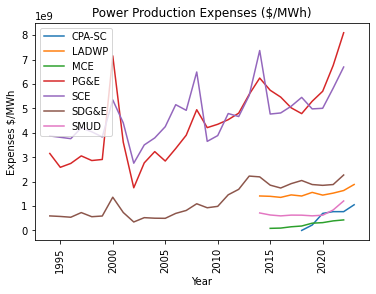

In [55]:
fig = plt.figure(facecolor="none")  # Sets the figure patch to transparent.

for lse in merged.LSE.unique():
    lse_data_filter = merged[merged['LSE']==lse]
    #display(lse_data_filter)
    plt.plot(lse_data_filter['Year'],lse_data_filter['Generation Combined Operational Costs'],label=lse)
plt.legend()
plt.title('Power Production Expenses ($/MWh)')
plt.ylabel('Expenses $/MWh')
plt.xlabel('Year')
plt.xticks(range(1995,2023,5),rotation=90)
plt.show()
#fig.savefig('real power production expenses per mwh.png', facecolor="w")  # Sets the figure patch to solid white for saving.


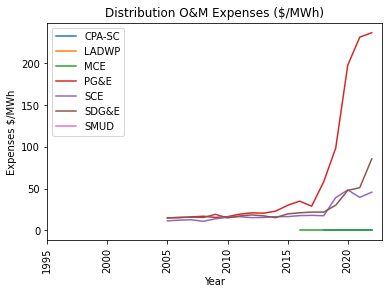

In [57]:
fig = plt.figure(facecolor="none")  # Sets the figure patch to transparent.

for lse in merged.LSE.unique():
    lse_data_filter = merged[merged['LSE']==lse]
    #display(lse_data_filter)
    #lse_data_filter = lse_data_filter[lse_data_filter['Sales (MWh)_res'].notna()]
    #lse_data_filter = lse_data_filter[lse_data_filter['Distribution Operation + Maintenance'].notna()]
    #lse_data_filter['DistrOpexPerMWh']=0
    #lse_data_filter.loc['DistrOpexPerMWh',:]=lse_data_filter['Distribution Operation + Maintenance']/lse_data_filter['Sales (MWh)_res']
    plt.plot(lse_data_filter['Year'],lse_data_filter['Distribution Operation + Maintenance']/lse_data_filter['Sales (MWh)_res'],label=lse)
plt.legend()
plt.title('Distribution O&M Expenses ($/MWh)')
plt.ylabel('Expenses $/MWh')
plt.xlabel('Year')
plt.xticks(range(1995,2023,5),rotation=90)
plt.show()
#fig.savefig('real power production expenses per mwh.png', facecolor="w")  # Sets the figure patch to solid white for saving.


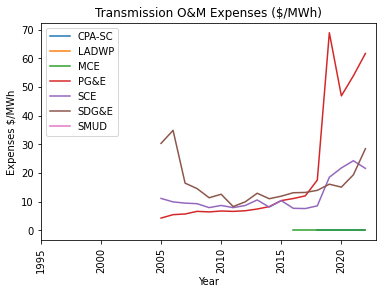

In [60]:
fig = plt.figure(facecolor="none")  # Sets the figure patch to transparent.

for lse in merged.LSE.unique():
    lse_data_filter = merged[merged['LSE']==lse]
    #display(lse_data_filter)
    #lse_data_filter = lse_data_filter[lse_data_filter['Sales (MWh)_res'].notna()]
    #lse_data_filter = lse_data_filter[lse_data_filter['Distribution Operation + Maintenance'].notna()]
    #lse_data_filter['DistrOpexPerMWh']=0
    #lse_data_filter.loc['DistrOpexPerMWh',:]=lse_data_filter['Distribution Operation + Maintenance']/lse_data_filter['Sales (MWh)_res']
    plt.plot(lse_data_filter['Year'],lse_data_filter['Transmission Operation + Maintenance']/lse_data_filter['Sales (MWh)_res'],label=lse)
plt.legend()
plt.title('Transmission O&M Expenses ($/MWh)')
plt.ylabel('Expenses $/MWh')
plt.xlabel('Year')
plt.xticks(range(1995,2023,5),rotation=90)
plt.show()
#fig.savefig('real power production expenses per mwh.png', facecolor="w")  # Sets the figure patch to solid white for saving.
